In [22]:
import pickle
import random
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


# loading data from train_dataset.pickle into the variable data_train
with open('train_dataset.pickle','rb') as f:
    data_train=pickle.load(f)
    f.close()

# loading data from test_dataset.pickle into the variable data_test
with open('test_dataset.pickle','rb') as f:
    data_test=pickle.load(f)
    f.close()

# shuffling data
np.random.shuffle(data_train)

# dividing the shuffled data into 20 equal parts
data_train_parts=np.array_split(data_train,20)

# initialising arrays
bias_array = []
var_array = []
ie_array=[]
mse_array=[]

for i in range(1,16):
    poly = PolynomialFeatures(degree=i)
    poly_temp = PolynomialFeatures(degree=i)
    
#   Y_test_poly has all the y values of the test data
    Y_test_poly = data_test[:,1].reshape(-1, 1)
    
    val=0
    var_=0
    mse_sum=0

#   X_test_poly has all the x values of the test data
    X_test_poly = poly.fit_transform(data_test[:,0].reshape(-1, 1))
    
#   X_train_parts_poly has trained x values from the train data files
    X_train_parts_poly = [poly.fit_transform(part[:,0].reshape(-1,1)) for part in data_train_parts]

#   Y_train_parts_poly has trained y values from the train data files
    Y_train_parts_poly = [part[:,1].reshape(-1,1) for part in data_train_parts]

#   function to predict Y value given an X_test_poly value, X_train_parts_poly value and Y_train_parts_poly value
    def model_prediction(X_test, X_train, Y_train):
        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_test_predict=model.predict(X_test)
        return Y_test_predict

#   Y_test_predict has the list of y values predicted using the model(X_train_parts_poly, Y_train_parts_poly) and X_test_poly
    Y_test_predict = np.concatenate([model_prediction(X_test_poly, X_train_parts_poly[k], Y_train_parts_poly[k])
                                     for k in range(20)], axis=1)

    mean_prediction = np.mean(Y_test_predict, axis=1, keepdims=True)
    
#   bias
    val = np.abs(mean_prediction - Y_test_poly).sum() / len(Y_test_poly)
    bias_array.append(val)

#   variance
    var_ = np.mean((Y_test_predict - mean_prediction)**2)
    var_array.append(var_)

#   mse
    mse = np.mean((Y_test_predict - Y_test_poly)**2)
    mse_array.append(mse)

    
    mse_sum_t=0
    val_t=0
    var_t=0
    ie=0
    for j in range(0,200):
        sum_models_t=0
        ie_sum=0
        for k in range(0,20):
            sum_models_t=sum_models_t+Y_test_predict[j][k]
            ie_diff=Y_test_poly[j]-Y_test_predict[j][k]
            ie_sum=ie_sum+(ie_diff)*(ie_diff)
        ie_sum=(1/20)*ie_sum
        sum_models_t=sum_models_t/20
        t=abs(sum_models_t-Y_test_poly[j])
        val_t=val_t+t
        
        vsum=0
        for l in range(20):
            part_t=(Y_test_predict[j][l]-sum_models_t)**2
            vsum+=part_t
        vsum/=20
        
        mse_sum_t=mse_sum_t+ie_sum
        var_t=var_t+vsum
        
        r=t*t
        
        ie_part=ie_sum-((r)+vsum)
        ie=ie+ie_part
    
#     mse=mse_sum_t*(1/200)
#     mse_array.append(mse)
    
#     bias=(1/200)*val_t
#     bias_array.append(bias)

#     variance=var_t*(1/200)
#     var_array.append(variance)
    
    ie=(1/200)*ie
    ie_array.append(ie)

# print("bias")
# print(bias_array)

# print("variance")
# print(var_array)

# print("irreducible error")
# print(ie_array)

# print("mse")
# print(mse_array)

In [23]:
print("TASK 3")
print()
print("Values of Bias and Variance")
print()

for i in range(0,15):
    print("degree " + str(i+1)+ "  "+"bias->"+str(bias_array[i]) + "  "+"variance->"+str(var_array[i]))

TASK 3

Values of Bias and Variance

degree 1  bias->0.26932448530808284  variance->0.007118498832097167
degree 2  bias->0.08638895240979502  variance->0.0014483404375946727
degree 3  bias->0.03343252573687595  variance->0.0005569286936734478
degree 4  bias->0.025242601977342415  variance->0.0006355962776502324
degree 5  bias->0.024494926451731056  variance->0.001376997434074511
degree 6  bias->0.02660150225376083  variance->0.0022005395230687923
degree 7  bias->0.02777402498917035  variance->0.004142725910672229
degree 8  bias->0.029270431720380356  variance->0.005383990539124106
degree 9  bias->0.038319531977180264  variance->0.031796310328410265
degree 10  bias->0.03848456205320259  variance->0.02467547443755626
degree 11  bias->0.08224564426025902  variance->0.9454052173804132
degree 12  bias->0.16727542713725416  variance->5.400987407618309
degree 13  bias->0.41055872339225147  variance->41.402533840116924
degree 14  bias->0.5874322306632017  variance->106.48051180877576
degree 15

In [24]:
print("TASK 4")
print()
print("Values of Irreducible Error for the models")
print()

for i in range(0,15):
    print("degree " + str(i+1)+ "  "+"irreducible error->"+str(ie_array[i]))

TASK 4

Values of Irreducible Error for the models

degree 1  irreducible error->[7.84962373e-18]
degree 2  irreducible error->[1.10274203e-17]
degree 3  irreducible error->[-1.67807391e-18]
degree 4  irreducible error->[-1.13285574e-18]
degree 5  irreducible error->[9.54599355e-18]
degree 6  irreducible error->[3.27293531e-19]
degree 7  irreducible error->[2.65900583e-18]
degree 8  irreducible error->[2.94957201e-18]
degree 9  irreducible error->[1.77681763e-17]
degree 10  irreducible error->[8.79965588e-18]
degree 11  irreducible error->[2.34065697e-17]
degree 12  irreducible error->[3.05685653e-16]
degree 13  irreducible error->[4.01819935e-15]
degree 14  irreducible error->[4.11874555e-15]
degree 15  irreducible error->[-3.60402363e-14]


TASK 5

Bias^2−Variance Tradeoff Graph


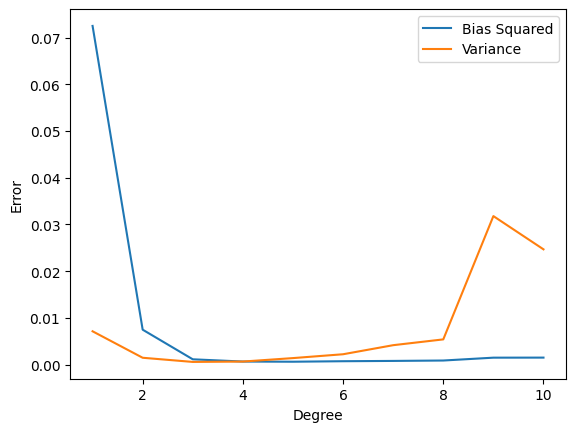

In [25]:
print("TASK 5")
print()
print("Bias^2−Variance Tradeoff Graph")

bias_array_sq = []
for i in range(0,len(bias_array)):
    t=bias_array[i]
    temp=t*t
    bias_array_sq.append(temp)

# print("bias square")
# print(bias_array_sq)

degree = []
for i in range(0,10):
    degree.append(i+1)
bias_array_sq = np.squeeze(bias_array_sq)
var_array = np.squeeze(var_array)
plt.plot(degree,bias_array_sq[:10], label='Bias Squared')
plt.plot(degree,var_array[:10], label='Variance')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()
plt.show()


Variation of Bias^2, Variance and MSE against degree of polynomial


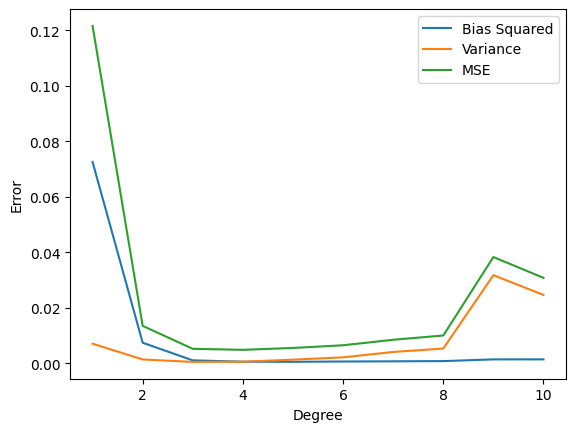

In [26]:
print()
print("Variation of Bias^2, Variance and MSE against degree of polynomial")

degree_ = []
for i in range(0,10):
    degree_.append(i+1)
bias_array_sq = np.squeeze(bias_array_sq)
var_array = np.squeeze(var_array)
mse_array = np.squeeze(mse_array)
plt.plot(degree_,bias_array_sq[:10], label='Bias Squared')
plt.plot(degree_,var_array[:10], label='Variance')
plt.plot(degree_,mse_array[:10], label='MSE')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend()
plt.show()